# Linear regression using tensorflow

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

%matplotlib inline

In [3]:
x_data=np.linspace(0.0,10.0,1000000)

In [4]:
noise=np.random.randn(len(x_data))

In [6]:
y=(0.5*x_data)+5+noise

In [7]:
data=pd.DataFrame(data={"x":x_data,"y":y})

In [8]:
data.head()

,x,y
0,0.00000,4.061056
1,0.00001,5.269537
2,0.00002,5.752232
3,0.00003,6.625589
4,0.00004,2.895797


Plotting scatter plot 

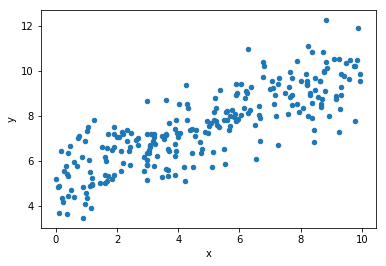

In [9]:
data.sample(n=250).plot(kind="scatter",x="x",y="y")

In [10]:
np.random.seed(100)

In [14]:
initial_vals=np.random.randn(2)

In [20]:
weight=tf.Variable(initial_vals[0])

In [21]:
bias=tf.Variable(initial_vals[1])

In [22]:
batch_size=10

In [25]:
xph=tf.placeholder(tf.float64,shape=[batch_size],name="xph")
yph=tf.placeholder(tf.float64,shape=[batch_size],name="yph")

In [26]:
h=weight*xph+bias

In [27]:
cost=tf.reduce_sum(tf.square(yph-h))

In [28]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [29]:
train_op=optimizer.minimize(cost)

In [32]:
init=tf.global_variables_initializer()
iteration=1000
trained_weight=None
trained_bias=None

In [34]:
with tf.Session() as sess:
    sess.run(init)
    for i in range(iteration):
        random_index=np.random.randint(len(x_data),size=batch_size)
        feed_dict={xph:x_data[random_index],yph:y[random_index]}
        sess.run(train_op,feed_dict=feed_dict)
    trained_weight,trained_bias=sess.run([weight,bias])    
    

In [35]:
trained_weight

0.4805833681968751

In [36]:
trained_bias

4.932268247177704

In [37]:
y_predict=trained_weight*x_data+trained_bias

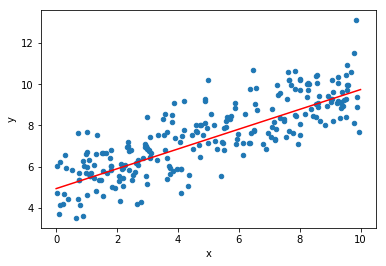

In [43]:
data.sample(n=250).plot(kind="scatter",x="x",y="y")
plt.plot(x_data,y_predict,"r")

# Linear rigression using tensorflow estimator